In [6]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [7]:
df = pd.read_csv("./post_study_questions.csv")
participant = pd.read_csv('./participant.csv')

In [8]:
ids = [1,3,5,8,11,14,17,22,24,31,33,32,38,39,42,43,46,47,50,51,54,55,58,59,61,62]

participant = participant[participant['id'].isin(ids)]

subset = participant[['id', 'gender']]
print(subset.to_string(index=False))

 id gender
  1 female
  3   male
  5   male
  8 female
 11   male
 14   male
 17 female
 22   male
 24   male
 31   male
 32   male
 33 female
 38   male
 39   male
 42   male
 43   male
 46   male
 47   male
 50   male
 51   male
 54   male
 55   male
 58   male
 59   male
 61   male
 62   male


In [9]:
# Merge gender into df
df = df.merge(subset, on="id", how="left")

In [15]:
df.head()

,helpfulness,satisfaction,intent_alignment,trust,future_use,ai_importance,participant_id,id,gender
0,4,4,5,4,4,4,1,1,female
1,4,3,4,3,4,4,3,2,NaN
2,5,4,4,3,4,4,5,3,male
3,1,1,2,2,2,3,8,4,NaN
4,4,5,5,4,4,5,11,5,male


In [10]:
# 1.Perceived Helpfulness

male_help = df[df['gender'] == 'male']['helpfulness']
female_help = df[df['gender'] == 'female']['helpfulness']

# A.1.Mann-Whitney U:
u_stat, u_p = stats.mannwhitneyu(male_help, female_help, alternative='two-sided')
print("Mann-Whitney U:", u_stat, "p-value:", u_p)

# U = 12.5
# p = 0.391 #not significant


Mann-Whitney U: 12.5 p-value: 0.39136593830755195


In [11]:
# B.1.t-test: 
t_stat, t_p = stats.ttest_ind(male_help, female_help, equal_var=False)
print("t-test:", t_stat, "p-value:", t_p)

# t = 1.10
# p = 0.318 #not significant


# Means: Male = 4.17, Female = 3.67
print("Male mean:", male_help.mean())
print("Female mean:", female_help.mean())

# Male mean: 4.17
# Female mean: 3.67


t-test: 1.1028219331407125 p-value: 0.3175573484663675
Male mean: 4.166666666666667
Female mean: 3.6666666666666665


C:\Users\Aliza\AppData\Local\Temp\ipykernel_12484\3674087240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='helpfulness', data=df, palette=['pink','blue'])


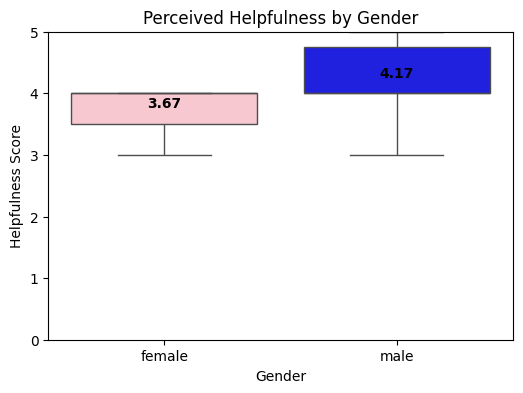

In [12]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='helpfulness', data=df, palette=['pink','blue'])

# Add mean values
group_means = df.groupby('gender')['helpfulness'].mean()
for i, (gender, mean_val) in enumerate(group_means.items()):
    plt.text(i, mean_val + 0.1, f"{mean_val:.2f}", ha='center', color='black', weight='bold')

plt.ylim(0,5)
plt.title('Perceived Helpfulness by Gender')
plt.ylabel('Helpfulness Score')
plt.xlabel('Gender')

plt.show()


In [84]:
# Based on the results above we came to conclusion: "No statistically significant gender difference in perceived helpfulness, while both of them 
# find the discussion with AI helpful"

In [14]:
# 2.Satisfaction with Output

male_satis = df[df['gender'] == 'male']['satisfaction']
female_satis = df[df['gender'] == 'female']['satisfaction']

# A.2.Mann-Whitney U:
u_stat, u_p = stats.mannwhitneyu(male_satis, female_satis, alternative='two-sided')
print("Mann-Whitney U:", u_stat, "p-value:", u_p)

# U = 10.0
# p = 0.885 #not significant

Mann-Whitney U: 10.0 p-value: 0.8852339144732015


In [16]:
# B.2.t-test:
t_stat, t_p = stats.ttest_ind(male_satis, female_satis, equal_var=False)
print("t-test:", t_stat, "p-value:", t_p)

# t-test: t = 0.37
# p = 0.727 #not significant

print("Male mean:", male_satis.mean())
print("Female mean:", female_satis.mean())

# Male mean: 3.83
# Female mean: 3.67


t-test: 0.36760731104690453 p-value: 0.7273659773942448
Male mean: 3.8333333333333335
Female mean: 3.6666666666666665


C:\Users\Aliza\AppData\Local\Temp\ipykernel_12484\213649230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='satisfaction', data=df, palette=['pink','blue'])


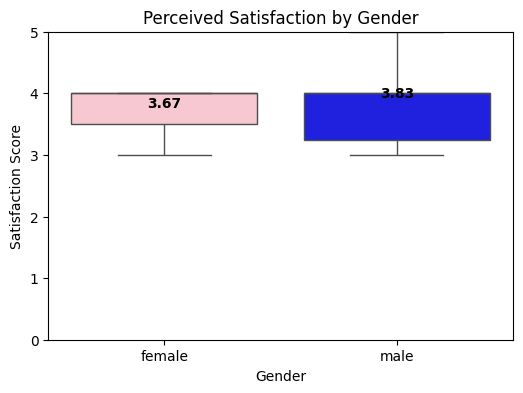

In [17]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='satisfaction', data=df, palette=['pink','blue'])

# Add mean values
group_means = df.groupby('gender')['satisfaction'].mean()
for i, (gender, mean_val) in enumerate(group_means.items()):
    plt.text(i, mean_val + 0.1, f"{mean_val:.2f}", ha='center', color='black', weight='bold')

plt.ylim(0,5)
plt.title('Perceived Satisfaction by Gender')
plt.ylabel('Satisfaction Score')
plt.xlabel('Gender')

plt.show()

In [92]:
# Based on the results above we came to conclusion: "No statistically significant gender difference in perceived helpfulness, while both of them 
# find the discussion with AI helpful"

In [18]:
# 3. Trust in AI Response

# A.3.Mann-Whitney U:
male_trust = df[df['gender'] == 'male']['trust']
female_turst = df[df['gender'] == 'female']['trust']

u_stat, u_p = stats.mannwhitneyu(male_trust, female_turst, alternative='two-sided')
print("Mann-Whitney U:", u_stat, "p-value:", u_p)

# U = 3.0,
# p = 0.101 #not significant

Mann-Whitney U: 3.0 p-value: 0.10105025592540992


In [19]:
# B.3.t-test:
t_stat, t_p = stats.ttest_ind(male_trust, female_turst, equal_var=False)
print("t-test:", t_stat, "p-value:", t_p)

# t-test: t = -3.2
# p = 0.025 #significant

print("Male mean:", male_trust.mean())
print("Female mean:", female_turst.mean())

# Male mean: 3.33
# Female mean: 4.0

t-test: -3.1622776601683786 p-value: 0.02503101581845297
Male mean: 3.3333333333333335
Female mean: 4.0


c:\Users\Aliza\Documents\HMI\hmi-ai-prompting\data-analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


C:\Users\Aliza\AppData\Local\Temp\ipykernel_12484\2329095781.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='trust', data=df, palette=['pink','blue'])


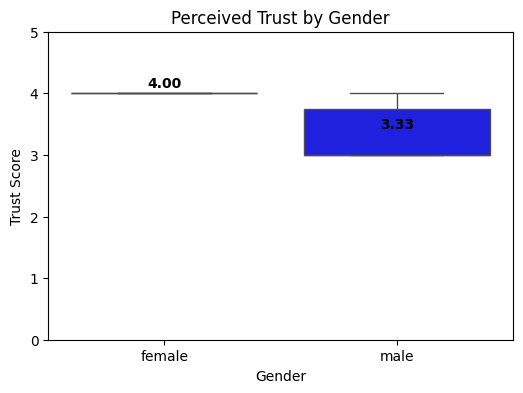

In [20]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='trust', data=df, palette=['pink','blue'])

# Add mean values
group_means = df.groupby('gender')['trust'].mean()
for i, (gender, mean_val) in enumerate(group_means.items()):
    plt.text(i, mean_val + 0.1, f"{mean_val:.2f}", ha='center', color='black', weight='bold')

plt.ylim(0,5)
plt.title('Perceived Trust by Gender')
plt.ylabel('Trust Score')
plt.xlabel('Gender')

plt.show()

In [100]:
# Based on the results above we came to conclusion: "Females reported higher trust in AI than males."

In [21]:
# 4. AI Use Frequency

# A.4.Chi - Sqaure:


# Step 1: Build contingency table (future_use × gender)
contingency_table = pd.crosstab(df['future_use'], df['gender'])

# Step 2: Run Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Display results
print("Chi-square Test Results")
print("------------------------")
print(f"Chi² statistic : {chi2:.2f}")
print(f"Degrees of freedom (df): {dof}")
print(f"p-value        : {p:.3f}\n")


Chi-square Test Results
------------------------
Chi² statistic : 2.25
Degrees of freedom (df): 3
p-value        : 0.522



In [ ]:
# Since Chi-square: χ² = 2.25, p = 0.522 (df = 3) → not significant, we can say No significant gender difference in intended future AI use.